In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv('HurtownieDane/PlayerSeason.csv')

In [3]:
df

,PlayerSeasonID,PlayerID,TeamID,Season,Salary,age,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct
0,1,1,1610612748,2000-01,2250000,37,82,"4,5","3,8","0,5","3,3","0,089","0,171","0,141","0,492"
1,2,2,1610612741,2000-01,316969,23,33,"6,0","1,1","1,9","-12,4","0,018","0,053","0,1689999999999999","0,495"
2,3,2,1610612741,2001-02,465850,24,45,"5,4","1,0","1,8","-3,8","0,022","0,067","0,221","0,477"
3,4,2,1610612744,2002-03,18748,25,2,"0,0","0,0","1,0","-3,9","0,0","0,0","0,282","0,0"
4,5,3,1610612745,2007-08,972720,23,51,"5,2","1,1","1,7","-0,5","0,026","0,085","0,2239999999999999","0,535"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,7993,1566,1610612739,2006-07,9442697,32,78,"11,9","7,7","1,6","4,6","0,128","0,204","0,218","0,527"
7993,7994,1566,1610612739,2007-08,10142156,33,73,"14,1","9,3","1,4","0,7","0,132","0,217","0,2289999999999999","0,522"
7994,7995,1566,1610612739,2008-09,10841615,34,65,"12,9","7,5","1,0","14,8","0,109","0,212","0,237","0,523"
7995,7996,1566,1610612739,2009-10,11541074,35,64,"7,4","5,4","0,8","7,9","0,107","0,1969999999999999","0,1889999999999999","0,491"


In [45]:
hist_age_df = df.groupby(['age']).count().reset_index().iloc[:,:2].rename(columns = {'PlayerSeasonID':'count'})

In [46]:
df_tmp = df.copy()
df_tmp['pts'] = df_tmp['pts'].astype(str).str.replace(',', '.')
df_tmp['pts'] = pd.to_numeric(df_tmp['pts'])
df_tmp['pts'] = df_tmp['pts'].round(0)
hist_pts_df = df_tmp.groupby(['pts']).count().reset_index().iloc[:,:2].rename(columns = {'PlayerSeasonID':'count'}).sort_values(by=['pts'])

In [56]:
df_tmp = df.copy()
df_tmp['ast'] = df_tmp['ast'].astype(str).str.replace(',', '.')
df_tmp['ast'] = pd.to_numeric(df_tmp['ast'])
df_tmp['ast'] = df_tmp['ast'].round(0)
hist_ast_df = df_tmp.groupby(['ast']).count().reset_index().iloc[:,:2].rename(columns = {'PlayerSeasonID':'count'}).sort_values(by=['ast'])

In [75]:
df_tmp = df.copy()
df_tmp['reb'] = df_tmp['reb'].astype(str).str.replace(',', '.')
df_tmp['reb'] = pd.to_numeric(df_tmp['reb'])
df_tmp['reb'] = df_tmp['reb'].round(0)
hist_reb_df = df_tmp.groupby(['reb']).count().reset_index().iloc[:,:2].rename(columns = {'PlayerSeasonID':'count'}).sort_values(by=['reb'])

In [84]:
df_tmp = df.copy()
df_tmp['ts_pct'] = df_tmp['ts_pct'].astype(str).str.replace(',', '.')
df_tmp['ts_pct'] = pd.to_numeric(df_tmp['ts_pct'])
df_tmp['ts_pct'] = df_tmp['ts_pct'].round(1)
hist_ts_df = df_tmp.groupby(['ts_pct']).count().reset_index().iloc[:,:2].rename(columns = {'PlayerSeasonID':'count'}).sort_values(by=['ts_pct'])

In [106]:
df_tmp = df.copy()
df_tmp['usg_pct'] = df_tmp['usg_pct'].astype(str).str.replace(',', '.')
df_tmp['usg_pct'] = pd.to_numeric(df_tmp['usg_pct'])
df_tmp['usg_pct'] = df_tmp['usg_pct'].round(1)
hist_usg_pct_df = df_tmp.groupby(['usg_pct']).count().reset_index().iloc[:,:2].rename(columns = {'PlayerSeasonID':'count'}).sort_values(by=['usg_pct'])

In [82]:
df_tmp = df.copy()
df_tmp['net_rating'] = df_tmp['net_rating'].astype(str).str.replace(',', '.')
df_tmp['net_rating'] = pd.to_numeric(df_tmp['net_rating'])
df_tmp['net_rating'] = df_tmp['net_rating'].round(0)
hist_net_rating_df = df_tmp.groupby(['net_rating']).count().reset_index().iloc[:,:2].rename(columns = {'PlayerSeasonID':'count'}).sort_values(by=['net_rating'])

In [95]:
def ploter(df, width = 0.7):
    df_new = df.copy()
    df_new['cumulative_sum'] = df['count'].cumsum()
    total_sum = df_new['count'].sum()
    third_sum = total_sum / 3
    two_third_sum = 2 * third_sum
    
    split_index_33 = df_new[df_new['cumulative_sum'] >= third_sum].index[0]
    split_33 = df_new.iloc[split_index_33, 0]
    
    split_index_66 = df_new[df_new['cumulative_sum'] >= two_third_sum].index[0]
    split_66 = df_new.iloc[split_index_66, 0]
    plt.figure(figsize=(10, 6))
    plt.bar(df.iloc[:,0], df['count'], width=width)
    # Dodawanie pionowych linii
    plt.axvline(x=split_33, color='red', linestyle='--', label=f'33% marker at {df.columns[0].upper()} {split_33}')
    plt.axvline(x=split_66, color='green', linestyle='--', label=f'66% marker at {df.columns[0].upper()} {split_66}')
    plt.xlabel(df.columns[0].upper())
    plt.ylabel('Count')
    plt.title(f'{df.columns[0].upper()} vs Count with 33% and 66% Markers')
    plt.legend()

### Experience

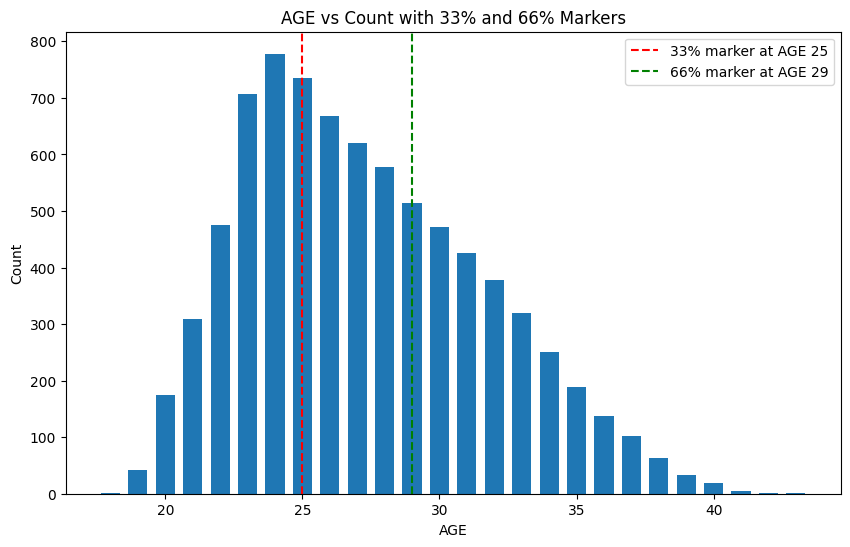

In [70]:
ploter(hist_age_df)

### Offense

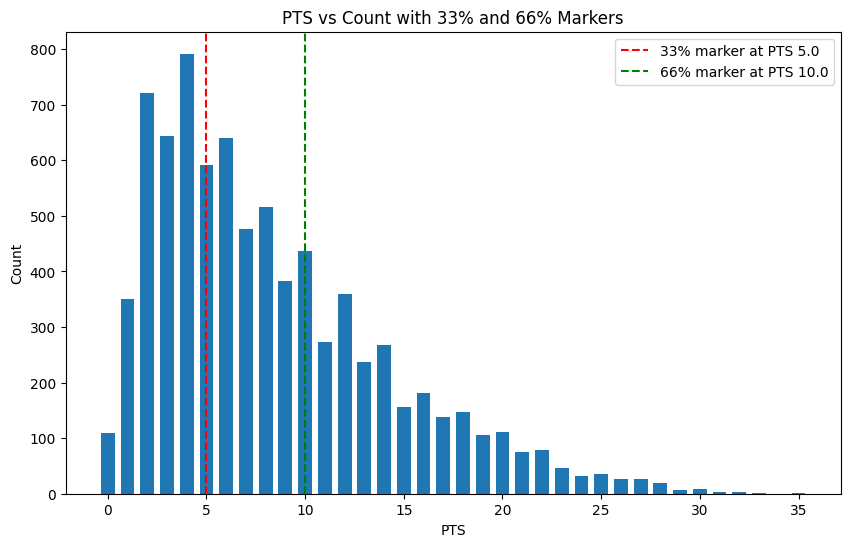

In [71]:
ploter(hist_pts_df)

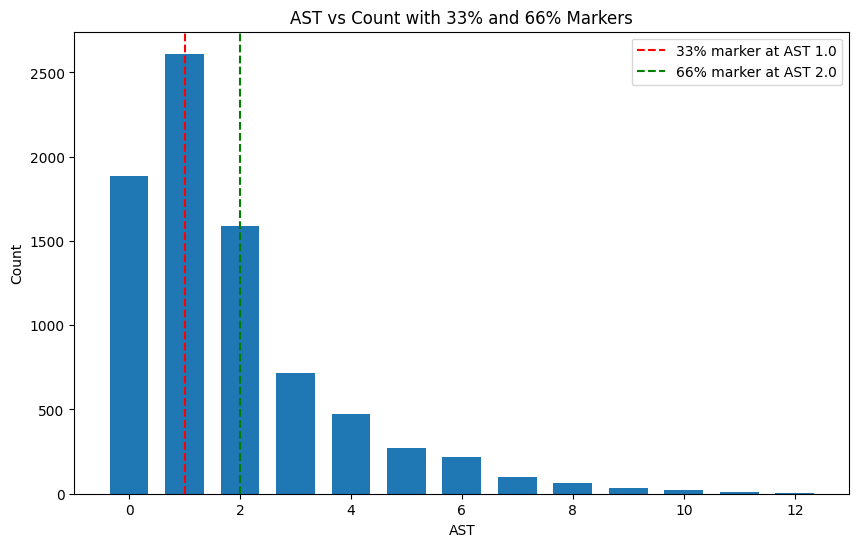

In [72]:
ploter(hist_ast_df)

### Deffense

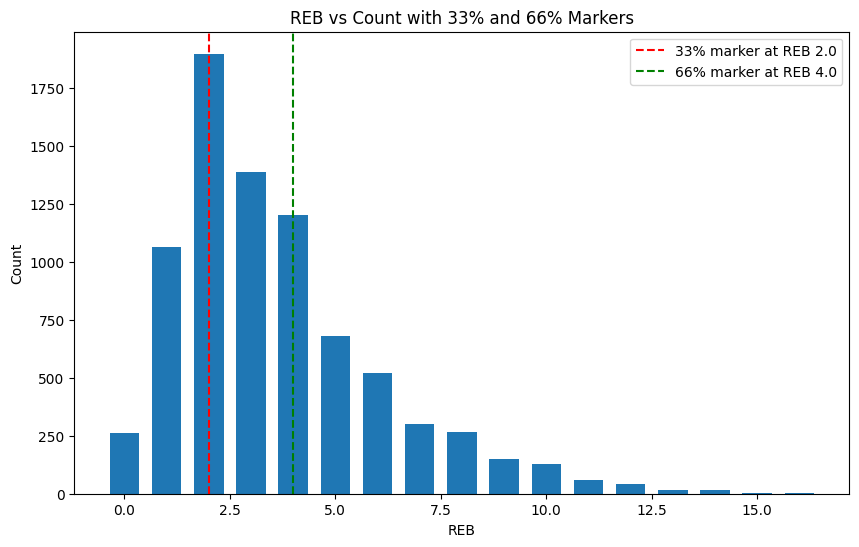

In [76]:
ploter(hist_reb_df)

### Efficiency

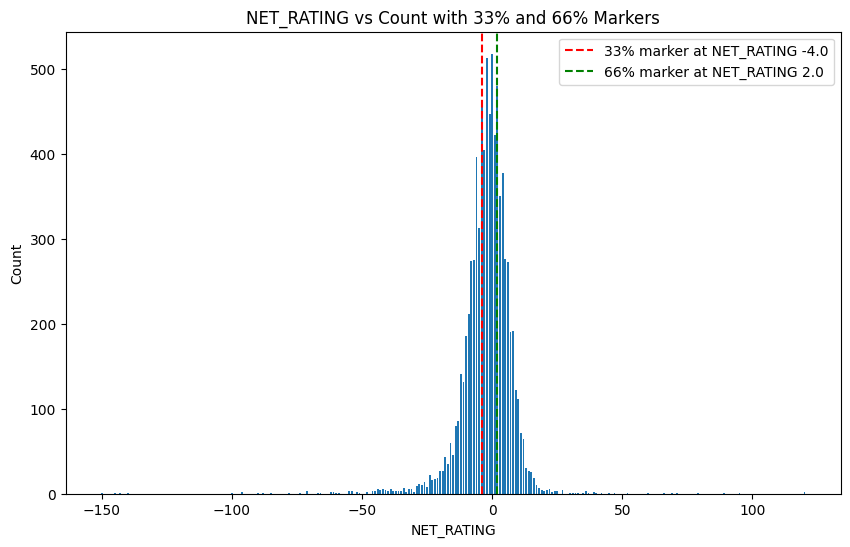

In [96]:
ploter(hist_net_rating_df)

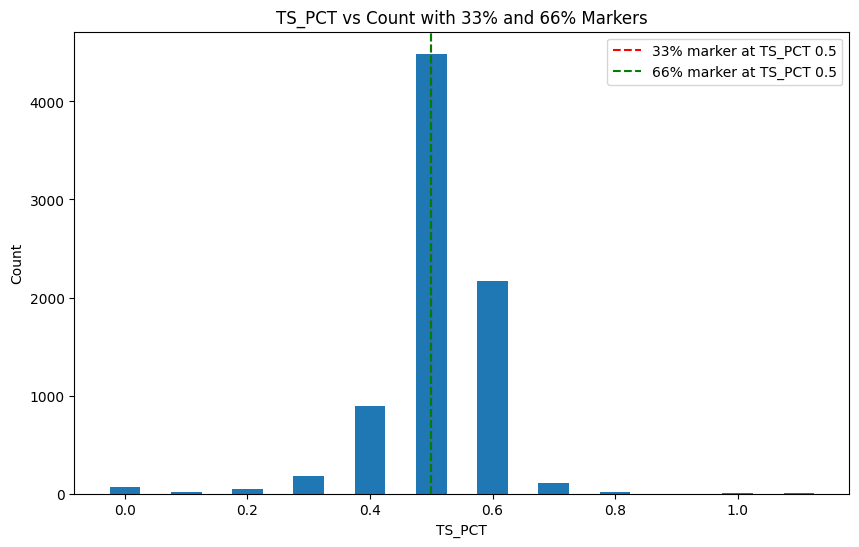

In [103]:
ploter(hist_ts_df, width = 0.05)

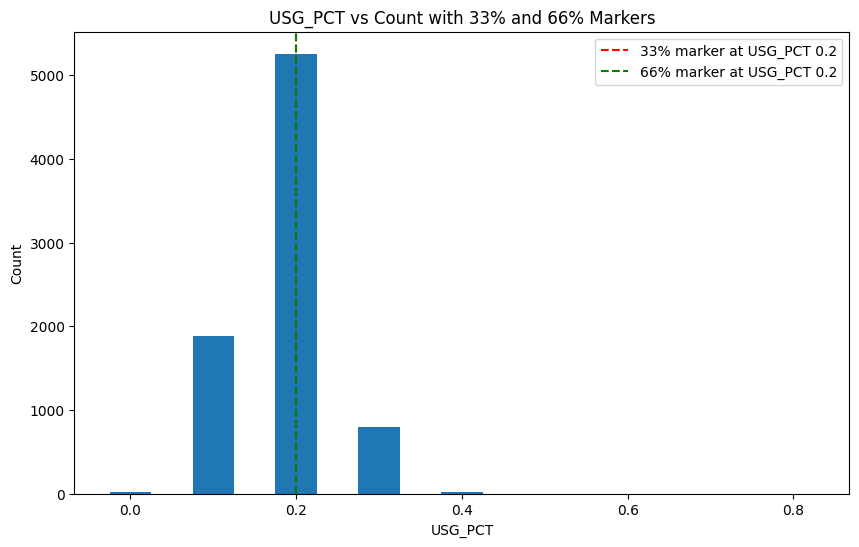

In [108]:
ploter(hist_usg_pct_df, width = 0.05)